In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

In [5]:
import pickle

encode_qry_path = "../outputs/qwen2vl-no_sys_no_one_word_no_RD_zero/ImageNet-R_qry"
encode_tgt_path = "../outputs/qwen2vl-no_sys_no_one_word_no_RD_zero/ImageNet-R_tgt"

# Immediate scoring and hard negative sampling for this subset
with open(encode_qry_path, 'rb') as f:
    qry_embeddings1, qry_index = pickle.load(f)
with open(encode_tgt_path, 'rb') as f:
    tgt_embeddings1, tgt_index = pickle.load(f)

In [6]:
from tqdm import tqdm
from datasets import load_dataset

eval_data = load_dataset(
    'TIGER-Lab/MMEB-eval',
    "ImageNet-R",
    split='test',
)

qry_dict = { ('<|image_1|>', tt['img_path']): i for i, tt in enumerate(qry_index) }
tgt_dict = { (tt['text'], tt['img_path']): i for i, tt in enumerate(tgt_index) }

pair_index1 = []
for i, row in tqdm(enumerate(eval_data)):
    q_key = ('<|image_1|>', row['qry_img_path'])
    positive = (row['tgt_text'][0].replace("Represent the given image.", "").strip(), row['tgt_img_path'][0])
    if q_key in qry_dict and positive in tgt_dict:
        pair_index1.append([qry_dict[q_key], tgt_dict[positive]])

len(pair_index1)

1000it [00:00, 2204.36it/s]


1000

In [7]:
import pickle

encode_qry_path = "../outputs/qwen2vl-no_sys_one_word_QD_RQD_zero/ImageNet-R_qry"
encode_tgt_path = "../outputs/qwen2vl-no_sys_one_word_QD_RQD_zero/ImageNet-R_tgt"

# Immediate scoring and hard negative sampling for this subset
with open(encode_qry_path, 'rb') as f:
    qry_embeddings2, qry_index = pickle.load(f)
with open(encode_tgt_path, 'rb') as f:
    tgt_embeddings2, tgt_index = pickle.load(f)

In [8]:
from tqdm import tqdm
from datasets import load_dataset

eval_data = load_dataset(
    'TIGER-Lab/MMEB-eval',
    "ImageNet-R",
    split='test',
)

qry_dict = { ('<|image_1|>', tt['img_path']): i for i, tt in enumerate(qry_index) }
tgt_dict = { (tt['text'].replace("\nRepresent the class label in one word", ""), tt['img_path']): i for i, tt in enumerate(tgt_index) }

pair_index2 = []
for i, row in tqdm(enumerate(eval_data)):
    q_key = ('<|image_1|>', row['qry_img_path'])
    positive = (row['tgt_text'][0], row['tgt_img_path'][0])
    if q_key in qry_dict and positive in tgt_dict:
        pair_index2.append([qry_dict[q_key], tgt_dict[positive]])

len(pair_index2)

1000it [00:00, 2172.04it/s]


1000

In [9]:
import pickle

encode_qry_path = "../outputs/qwen2vl-DD-R_only_Q-zero/ImageNet-R_qry"
encode_tgt_path = "../outputs/qwen2vl-DD-R_only_Q-zero/ImageNet-R_tgt"

# Immediate scoring and hard negative sampling for this subset
with open(encode_qry_path, 'rb') as f:
    qry_embeddings3, qry_index = pickle.load(f)
with open(encode_tgt_path, 'rb') as f:
    tgt_embeddings3, tgt_index = pickle.load(f)


In [10]:
from tqdm import tqdm
from datasets import load_dataset

eval_data = load_dataset(
    'TIGER-Lab/MMEB-eval',
    "ImageNet-R",
    split='test',
)

qry_dict = { (tt['text'], tt['img_path']): i for i, tt in enumerate(qry_index) }
tgt_dict = { (tt['text'], tt['img_path']): i for i, tt in enumerate(tgt_index) }

pair_index3 = []
for i, row in tqdm(enumerate(eval_data)):
    q_key = (row['qry_text'], row['qry_img_path'])
    positive = (row['tgt_text'][0], row['tgt_img_path'][0])
    if q_key in qry_dict and positive in tgt_dict:
        pair_index3.append([qry_dict[q_key], tgt_dict[positive]])

len(pair_index3)

1000it [00:00, 2172.69it/s]


1000

In [11]:
import numpy as np

num_samples = qry_embeddings1.shape[0]
# indices = np.random.randint(0, qry_embeddings1.shape[0], size=num_samples)

classes1 = sorted(list(set([x[1] for x in pair_index1])))
choice1 = np.array(classes1)
classes1 = {c: i for i, c in enumerate(classes1)}
for i in range(len(pair_index1)):
    pair_index1[i][1] = classes1[pair_index1[i][1]]
    
classes2 = sorted(list(set([x[1] for x in pair_index2])))
choice2 = np.array(classes2)
classes2 = {c: i for i, c in enumerate(classes2)}
for i in range(len(pair_index2)):
    pair_index2[i][1] = classes2[pair_index2[i][1]]
    
classes3 = sorted(list(set([x[1] for x in pair_index3])))
choice3 = np.array(classes3)
classes3 = {c: i for i, c in enumerate(classes3)}
for i in range(len(pair_index3)):
    pair_index3[i][1] = classes3[pair_index3[i][1]]

combined1 = np.vstack([qry_embeddings1, tgt_embeddings1[choice1]])
combined2 = np.vstack([qry_embeddings2, tgt_embeddings2[choice2]])
combined3 = np.vstack([qry_embeddings3, tgt_embeddings3[choice3]])

In [12]:
# FOR classification

class_indices1 = {}
for i, j in pair_index1:
    if j not in class_indices1:
        class_indices1[j] = []
    class_indices1[j].append(i)
    
class_indices2 = {}
for i, j in pair_index2:
    if j not in class_indices2:
        class_indices2[j] = []
    class_indices2[j].append(i)
    
class_indices3 = {}
for i, j in pair_index3:
    if j not in class_indices3:
        class_indices3[j] = []
    class_indices3[j].append(i)

/opt/conda/envs/modern/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/envs/modern/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/conda/envs/modern/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/envs/modern/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/conda/envs/modern/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/envs/modern/

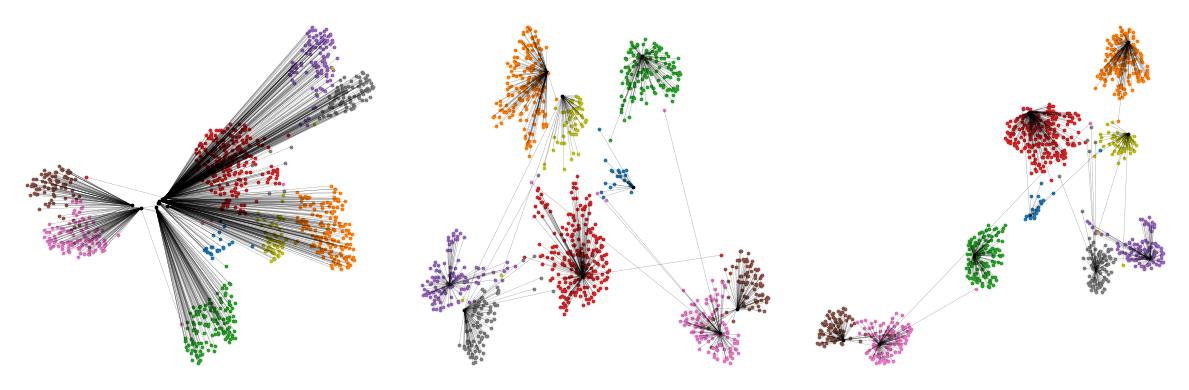

In [13]:
import numpy as np
from umap import UMAP
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from matplotlib.collections import LineCollection

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# UMAP dimensionality reduction
umap_model = UMAP(n_components=2, random_state=42, n_neighbors=64, min_dist=0.5)
emb_2d = umap_model.fit_transform(combined1)

# Separate 2D embeddings
qry_2d = emb_2d[:num_samples]
tgt_2d = emb_2d[num_samples:]

# Prepare line segments connecting positive pairs
segments = [[qry_2d[i], tgt_2d[j]] for i, j in pair_index1]

# Create a LineCollection and add to the plot
lc = LineCollection(segments, linewidths=0.2, alpha=0.5, color='black')
axes[0].add_collection(lc)

# axes[0].scatter(qry_2d[:, 0], qry_2d[:, 1], s=3, label='Query image')
axes[0].scatter(tgt_2d[:, 0], tgt_2d[:, 1], s=3, label='Target class', color='black')

for k, (c, indices) in enumerate(class_indices1.items()):
    indices = np.array(indices)
    axes[0].scatter(qry_2d[indices, 0], qry_2d[indices, 1], s=3, label=f'Class {c}', color=plt.cm.tab10(k % 10))

# axes[0].legend(markerscale=2)
axes[0].axis("off")


#-=----

# UMAP dimensionality reduction
umap_model = UMAP(n_components=2, random_state=42, n_neighbors=64, min_dist=0.5)
emb_2d = umap_model.fit_transform(combined2)

# Separate 2D embeddings
qry_2d = emb_2d[:num_samples]
tgt_2d = emb_2d[num_samples:]

# Prepare line segments connecting positive pairs
segments = [[qry_2d[i], tgt_2d[j]] for i, j in pair_index2]

# Create a LineCollection and add to the plot
lc = LineCollection(segments, linewidths=0.2, alpha=0.5, color='black')
axes[1].add_collection(lc)


# axes[1].scatter(qry_2d[:, 0], qry_2d[:, 1], s=3, label='Query image')
axes[1].scatter(tgt_2d[:, 0], tgt_2d[:, 1], s=3, label='Target class', color='black')

for k, (c, indices) in enumerate(class_indices2.items()):
    indices = np.array(indices)
    axes[1].scatter(qry_2d[indices, 0], qry_2d[indices, 1], s=3, label=f'Class {c}', color=plt.cm.tab10(k % 10))

# axes[1].legend(markerscale=2)    
axes[1].axis("off")


#-=----

# UMAP dimensionality reduction
umap_model = UMAP(n_components=2, random_state=42, n_neighbors=64, min_dist=0.5)
emb_2d = umap_model.fit_transform(combined3)

# Separate 2D embeddings
qry_2d = emb_2d[:num_samples]
tgt_2d = emb_2d[num_samples:]

# Prepare line segments connecting positive pairs
segments = [[qry_2d[i], tgt_2d[j]] for i, j in pair_index3]

# Create a LineCollection and add to the plot
lc = LineCollection(segments, linewidths=0.2, alpha=0.5, color='black')
axes[2].add_collection(lc)

# axes[2].scatter(qry_2d[:, 0], qry_2d[:, 1], s=3, label='Query image')
axes[2].scatter(tgt_2d[:, 0], tgt_2d[:, 1], s=3, label='Target class', color='black')

for k, (c, indices) in enumerate(class_indices3.items()):
    indices = np.array(indices)
    axes[2].scatter(qry_2d[indices, 0], qry_2d[indices, 1], s=3, label=f'Class {c}', color=plt.cm.tab10(k % 10))

# axes[2].legend(markerscale=2)    
axes[2].axis("off")



# plt.title('UMAP Projection of Query and Target Embeddings')
# plt.xlabel('UMAP Dimension 1')
# plt.ylabel('UMAP Dimension 2')
# plt.legend(markerscale=2)
plt.grid(False)

plt.tight_layout()
plt.show()